## Imports

In [1]:
import os
import sys

import numpy as np

from deepverse import ParameterManager
from deepverse.scenario import ScenarioManager
from deepverse import Dataset 

from deepverse.visualizers import ImageVisualizer, LidarVisualizer

## Parameter reading

In [2]:
# Path to the configuration file
scenario_name = "DT31"
config_path = f"scenarios/{scenario_name}/param/config.m"

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)
params = param_manager.get_params()

# # Print the loaded parameters
print("Loaded Parameters:")
print(params)

Loaded Parameters:
{'dataset_folder': 'scenarios', 'scenario': 'DT31', 'scenes': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.

## Generate a dataset

In [3]:
%%capture output
# Generate a dataset
dataset = Dataset(config_path)


## Access samples

### Access camera sample

In [4]:
camera_sample = dataset.get_sample('cam', index=0, device_index="unit1_cam1")  # Get sample from camera 1
print(camera_sample)

ValueError: Invalid sensor index: Camera

### Access LiDAR sample

In [5]:
lidar_sample = dataset.get_sample('lidar', index=0, device_index="unit1_lidar1")  # Get sample from LiDAR 1
print(lidar_sample)

ValueError: Invalid sensor index: LiDAR

### Access radar sample

In [6]:
radar_sample = dataset.get_sample('radar', index=0, bs_idx=0, ue_idx=0)
print(radar_sample.coeffs.shape)
# There is no UE, it is the bs_tx_idx=bs_idx and bs_rx_idx=ue_idx
# Channel can be reached with:
# radar_sample.coeffs
# ------- Some print examples ----------
# print(radar_sample)
# print(radar_sample.paths)
# print(radar_sample.waveform)
# print(radar_sample.tx_antenna)
# print(radar_sample.rx_antenna)

(16, 1, 256, 256)


### Access BS-UE channel sample

In [7]:
comm_sample = dataset.get_sample('comm-ue', index=0, bs_idx=0, ue_idx=0)
print(comm_sample.coeffs.shape)
# Channel can be reached with:
# comm_sample.coeffs
# ------- Some print examples ----------
# print(comm_sample)
# print(comm_sample.paths)
# print(comm_sample.LoS_status)
# print(comm_sample.tx_antenna)
# print(comm_sample.rx_antenna)

(1, 16, 8)


### Access BS-BS channel sample

In [8]:
comm_bs2bs_sample = dataset.get_sample('comm-bs', index=0, bs_idx=0, ue_idx=0)
print(comm_bs2bs_sample.coeffs.shape)
# Channel can be reached with:
# comm_bs2bs_sample.coeffs
# ------- Some print examples ----------
# print(comm_bs2bs_sample)
# print(comm_bs2bs_sample.paths)
# print(comm_bs2bs_sample.LoS_status)
# print(comm_bs2bs_sample.tx_antenna)
# print(comm_bs2bs_sample.rx_antenna)

(16, 16, 8)


### Access location and mobility sample

In [9]:
# Access bs location sample
bs_location = dataset.get_sample('loc-bs', index=0, bs_idx=0)
print(bs_location)

# Access user location sample
ue_location = dataset.get_sample('loc-ue', index=0, ue_idx=0)
print(ue_location)

# Access user mobility sample
mobility = dataset.get_sample('mobility', index=0, object_id=0)
print(mobility)

[-57.771   96.141    3.4537]
[-44.6594  93.8778   1.68  ]
{'time': 1, 'location': [-44.659400514999994, 93.877812335, 0], 'angle': -86.0, 'speed': 4.47, 'acceleration': 0, 'bounding_box': array([[-4.68194005e+01,  9.28278123e+01, -5.00000000e-02],
       [-4.24994005e+01,  9.49278123e+01,  1.73000000e+00]]), 'tx_height': 1.68, 'slope': 0}


## Visualization test

In [10]:
# Visualizing scenario
# Set visualization backend for scenario and visualize samples
# Needs pip install pyvista[all] for the below to work

# dataset.scenario.visualizer.set_backend('pyvista')
# dataset.scenario.visualize()

In [11]:
# Visualizing camera data
# Set visualization backend for camera and visualize samples
# Supported backend in ImageVisualizer.supported_backends
dataset.set_visualization_backend('cam', 'matplotlib')
dataset.visualize('cam', 'unit1_cam1', 0)

/home/dlghdbs200/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


ValueError: Invalid sensor index: Camera

In [12]:
# Visualizing LiDAR data
# Set visualization backend for lidar and visualize samples
# Supported backend in LidarVisualizer.supported_backends
# Needs pip install open3d for the below to work

# dataset.set_visualization_backend('lidar', 'open3d')
# dataset.visualize('lidar', 'unit1_lidar1', 0)

## Plot BS beam power and user position

### Simple beam-steering codebook

In [13]:
def beam_steering_codebook(angles, num_z, num_x):
    d = 0.5
    k_z = np.arange(num_z)
    k_x = np.arange(num_x)
    
    codebook = []
    
    for beam_idx in range(angles.shape[0]):
        z_angle = angles[beam_idx, 0]
        x_angle = angles[beam_idx, 1]
        bf_vector_z = np.exp(1j * 2 * np.pi * k_z * d * np.cos(np.radians(z_angle)))
        bf_vector_x = np.exp(1j * 2 * np.pi * k_x * d * np.cos(np.radians(x_angle)))
        bf_vector = np.outer(bf_vector_z, bf_vector_x).flatten()
        codebook.append(bf_vector)
    
    return np.stack(codebook, axis=0)

# Construct beam steering codebook
num_angles = 64
x_angles = np.linspace(0, 180, num_angles + 1)[1:]
x_angles = np.flip(x_angles)
z_angles = np.full(num_angles, 90)
beam_angles = np.column_stack((z_angles, x_angles))
codebook = beam_steering_codebook(beam_angles, 1, 16)

### Apply beam-steering codebook to channels

In [14]:
# Apply codebook to bs-ue comm channel
beam_power = []
ue_loc = []
num_scene = len(dataset.params['scenes'])
for i in range(num_scene):
    channel = dataset.get_sample('comm-ue', index=i, bs_idx=0, ue_idx=0).coeffs
    ue_loc_ = dataset.get_sample('loc-ue', index=i, bs_idx=0, ue_idx=0)
    
    beam_power_ = (np.abs(codebook @ np.squeeze(channel, 0))**2).sum(-1)
    beam_power.append(beam_power_)

    ue_loc.append(ue_loc_)

bs_loc = dataset.get_sample('loc-bs', index=0, bs_idx=0)

### Plot video

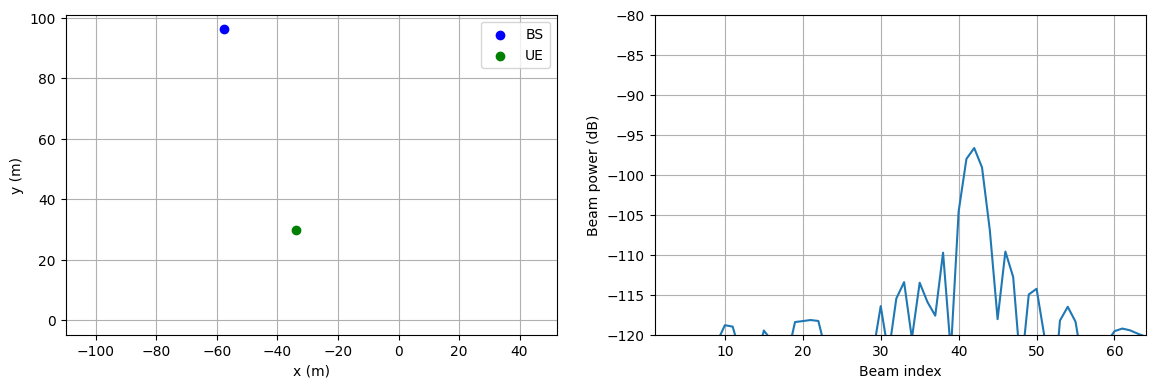

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# fig.subplots_adjust(hspace=0.5)

# Initialize plots
axes[0].scatter(bs_loc[0], bs_loc[1], color='b', label='BS')
ue_scatter = axes[0].scatter([0], [0], color='g', label='UE')
axes[0].set_xlim([-100, 100])
axes[0].set_ylim([0, 120])
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
axes[0].legend()
axes[0].axis('equal')
axes[0].grid(True)

line, = axes[1].plot(range(1, num_angles + 1), 10 * np.log10(beam_power[0]))
axes[1].set_xlim([1, num_angles])
axes[1].set_ylim([-120, -80])
axes[1].set_xlabel('Beam index')
axes[1].set_ylabel('Beam power (dB)')
axes[1].grid(True)

fig.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.15)



# Update function for animation
def update(i):
    ue_scatter.set_offsets([ue_loc[i][0], ue_loc[i][1]])  # Update UE location
    line.set_data(range(1, num_angles + 1), 10 * np.log10(beam_power[i]))  # Update beam power
    return ue_scatter, line

# Create animation
ani = FuncAnimation(fig, update, frames=num_scene, interval=100, blit=True)

# Display the animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml(default_mode="once"))